In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

In C:\Users\Administrator\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Administrator\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Administrator\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Administrator\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Administrator\anaconda3\lib\site-packages\matplo

# Getting the datasets we will use

In [2]:
path=r'C:\Users\Administrator\Documents\Data Analytics Real World Project -Python\2-Time Series Data Analysis\individual_stocks_5yr'
company_list = ['AAPL_data.csv', 'GOOG_data.csv', 'MSFT_data.csv', 'AMZN_data.csv']

#blank dataframe
all_data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(path+"/"+file)
    all_data = pd.concat([all_data, current_df])
    
all_data.shape

(4752, 7)

In [3]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [6]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [7]:
all_data['date']=pd.to_datetime(all_data['date'])

In [8]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [9]:
all_data['date'][0]

0   2013-02-08
0   2014-03-27
0   2013-02-08
0   2013-02-08
Name: date, dtype: datetime64[ns]

# Analyizing the closing price of stocks

In [11]:
tech_list=all_data['Name'].unique()

In [12]:
tech_list

array(['AAPL', 'GOOG', 'MSFT', 'AMZN'], dtype=object)

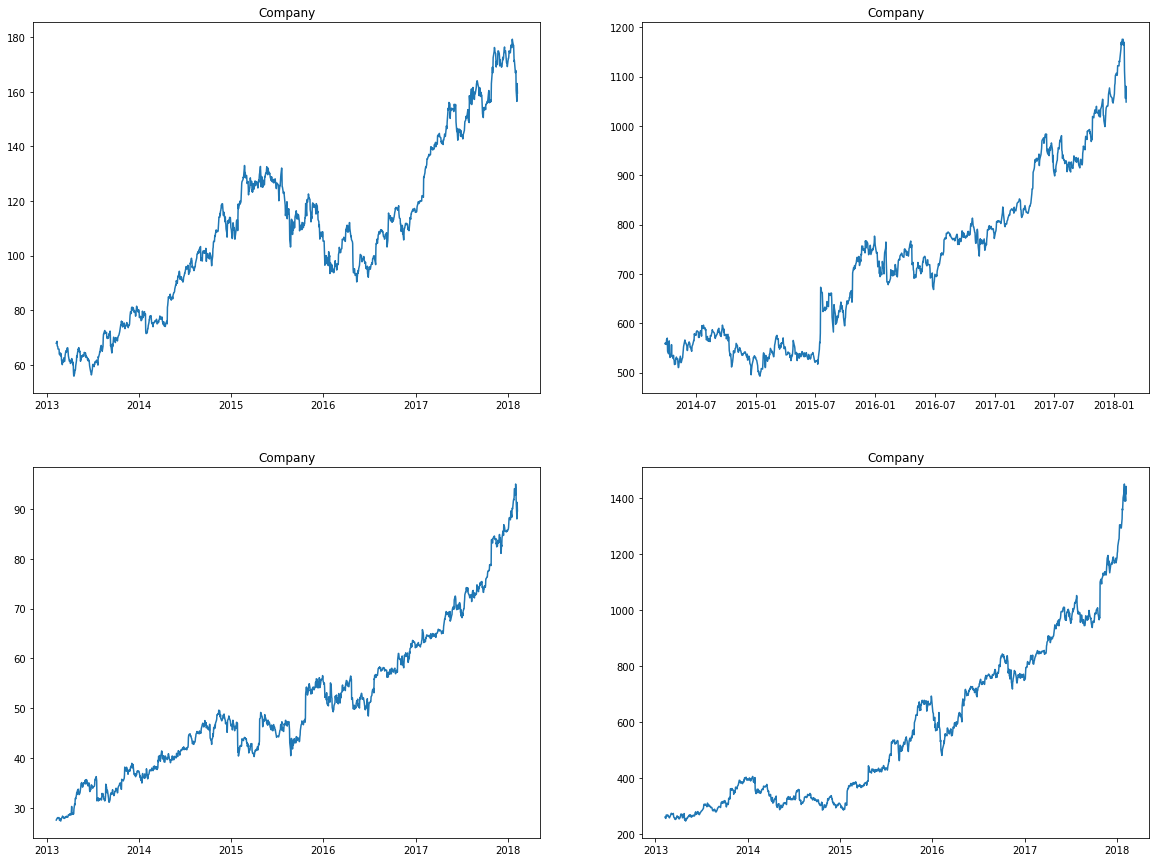

In [16]:
plt.figure(figsize=(20,15))
for i,company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['close'])
    plt.title('Company')

# Analyzing total volume of stock being traded

In [19]:
!pip install plotly

In [20]:
import plotly.express as px

In [22]:
for company in tech_list:
    df=all_data[all_data['Name']==company]
    fig=px.line(df,x='date',y='volume',title=company)
    fig.show()

# Analyzing the daily price changes

In [23]:
df=pd.read_csv(r'C:\Users\Administrator\Documents\Data Analytics Real World Project -Python\2-Time Series Data Analysis\individual_stocks_5yr/AMZN_data.csv')


In [24]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [25]:
df['Daily_return']=df['close']-df['open']

In [26]:
df.head()

,date,open,high,low,close,volume,Name,Daily_return
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,0.55
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,-5.99
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,-0.49
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,7.94
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,1.87


In [35]:
df['Daily return %']=((df['Daily_return']/df['close'])*100)
df.head(30)

,date,open,high,low,close,volume,Name,Daily_return,Daily return %
0,2013-02-08,261.40,265.250,260.5550,261.950,3879078,AMZN,0.550,0.209964
1,2013-02-11,263.20,263.250,256.6000,257.210,3403403,AMZN,-5.990,-2.328836
2,2013-02-12,259.19,260.160,257.0000,258.700,2938660,AMZN,-0.490,-0.189409
3,2013-02-13,261.53,269.960,260.3000,269.470,5292996,AMZN,7.940,2.946525
4,2013-02-14,267.37,270.650,265.4000,269.240,3462780,AMZN,1.870,0.694548
5,2013-02-15,267.63,268.920,263.1100,265.090,3979832,AMZN,-2.540,-0.958165
6,2013-02-19,265.91,270.110,264.5000,269.750,2853752,AMZN,3.840,1.423540
7,2013-02-20,270.20,274.300,266.3710,266.410,3528862,AMZN,-3.790,-1.422619
8,2013-02-21,265.12,269.480,263.2500,265.940,3637396,AMZN,0.820,0.308340
9,2013-02-22,266.62,267.110,261.6100,265.420,3123402,AMZN,-1.200,-0.452114


# Visualising using plotly

In [28]:
df['date']=pd.to_datetime(df['date'])

In [30]:
fig = px.line(df, x="date", y="Daily return %", title=company)
fig.show()

analyzing between some dates

(array([15744., 15751., 15758., 15765., 15772., 15779., 15786.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

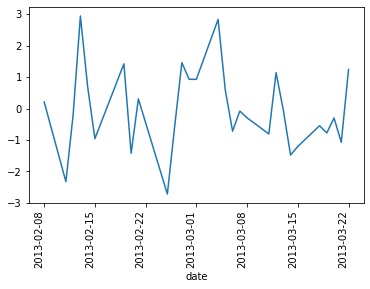

In [36]:
df.set_index('date')['2013-02-08':'2013-03-22']['Daily return %'].plot()
plt.xticks(rotation='vertical')

# Analyzing monthly mean of closing price

In [37]:
df2=df.copy()

In [38]:
df2['date']=pd.to_datetime(df2['date'])

In [39]:
df2.set_index('date',inplace=True)

In [40]:
df2.head()

,open,high,low,close,volume,Name,Daily_return,Daily return %
date,,,,,,,,
2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,0.55,0.209964
2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,-5.99,-2.328836
2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,-0.49,-0.189409
2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,7.94,2.946525
2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,1.87,0.694548


<AxesSubplot:xlabel='date'>

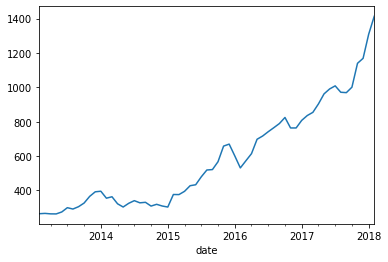

In [45]:
df2['close'].resample('M').mean().plot()

<AxesSubplot:xlabel='date'>

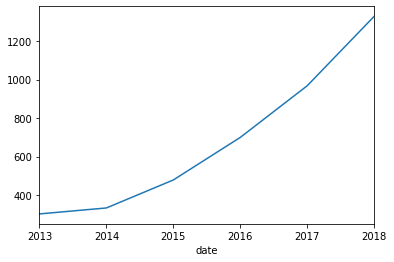

In [46]:
df2['close'].resample('Y').mean().plot()

# Checking correlation between different companies closing prices

In [47]:
#Reading data of companies

In [50]:
amzn=pd.read_csv(r'C:\Users\Administrator\Documents\Data Analytics Real World Project -Python\2-Time Series Data Analysis\individual_stocks_5yr/AMZN_data.csv')
goog=pd.read_csv(r'C:\Users\Administrator\Documents\Data Analytics Real World Project -Python\2-Time Series Data Analysis\individual_stocks_5yr/GOOG_data.csv')
msft=pd.read_csv(r'C:\Users\Administrator\Documents\Data Analytics Real World Project -Python\2-Time Series Data Analysis\individual_stocks_5yr/MSFT_data.csv')
aapl=pd.read_csv(r'C:\Users\Administrator\Documents\Data Analytics Real World Project -Python\2-Time Series Data Analysis\individual_stocks_5yr/AAPL_data.csv')

amzn.head()
goog.head()
msft.head()
aapl.head()


,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [51]:
goog.head()


,date,open,high,low,close,volume,Name
0,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG
1,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG
2,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG
3,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG
4,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG


In [52]:
msft.head()


,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [53]:
aapl.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [54]:
#Creating a data frame with closing values of different companies

In [56]:
df=pd.DataFrame()
df['amzn']=amzn['close']
df['aapl']=aapl['close']
df['msft']=msft['close']
df['goog']=goog['close']

In [57]:
df.head()

,amzn,aapl,msft,goog
0,261.95,67.8542,27.55,558.46
1,257.21,68.5614,27.86,559.99
2,258.70,66.8428,27.88,556.97
3,269.47,66.7156,28.03,567.16
4,269.24,66.6556,28.04,567.00


In [58]:
import seaborn as sns

ploting a pairwise plot for different companies closing price

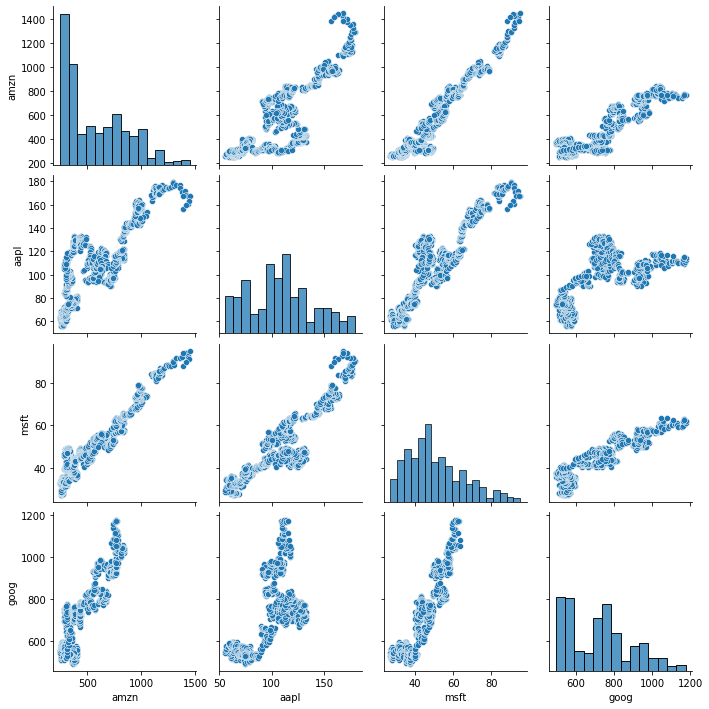

In [64]:
sns.pairplot(data=df)

<AxesSubplot:>

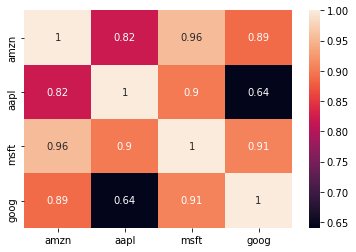

In [65]:
sns.heatmap(df.corr(),annot=True)

From the above plots we can the amazon and microsoft closing prices are highly correalted

In [66]:
df.head()

,amzn,aapl,msft,goog
0,261.95,67.8542,27.55,558.46
1,257.21,68.5614,27.86,559.99
2,258.70,66.8428,27.88,556.97
3,269.47,66.7156,28.03,567.16
4,269.24,66.6556,28.04,567.00


# checking correlations for daily returns

In [67]:
data=pd.DataFrame()


In [68]:
data['appl_change']=((aapl['close']-aapl['open'])/aapl['close'])*100
data['goog_change']=((goog['close']-goog['open'])/goog['close'])*100
data['amzn_change']=((amzn['close']-amzn['open'])/amzn['close'])*100
data['msft_change']=((msft['close']-msft['open'])/msft['close'])*100

In [69]:
data.head()

,appl_change,goog_change,amzn_change,msft_change
0,0.206325,-1.708269,0.209964,0.725953
1,0.714688,-0.216075,-2.328836,0.753769
2,-2.481344,-1.781065,-0.189409,0.000000
3,-0.042869,1.489879,2.946525,0.356761
4,0.443624,0.334039,0.694548,0.427960


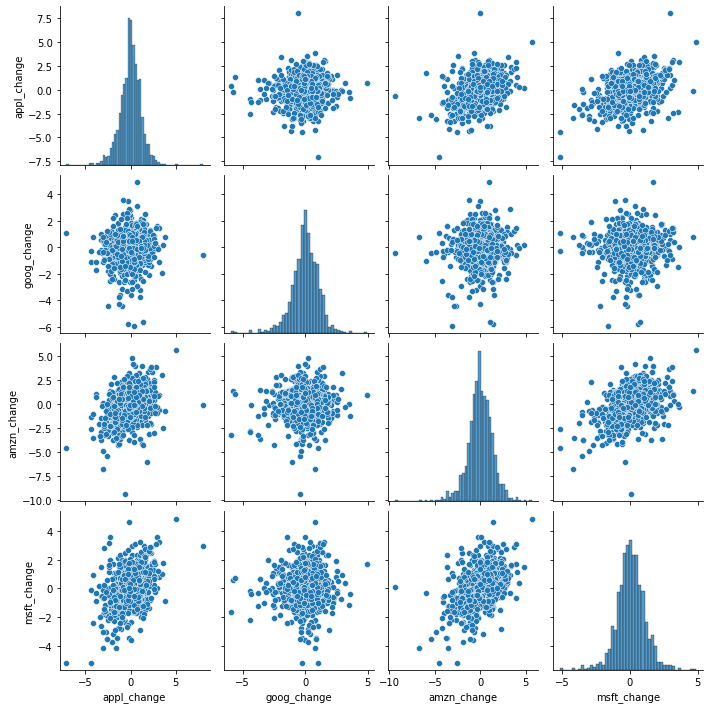

In [70]:
sns.pairplot(data=data)

Correaltion plot for daily returns

<AxesSubplot:>

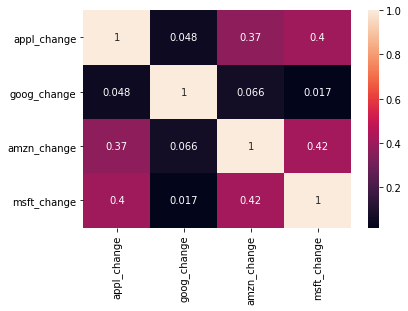

In [72]:
sns.heatmap(data.corr(),annot=True)

We can see that Amazona and Microsoft are correlated in terms of daily returns

# Value risk analysis of AAPL

<AxesSubplot:xlabel='appl_change', ylabel='Density'>

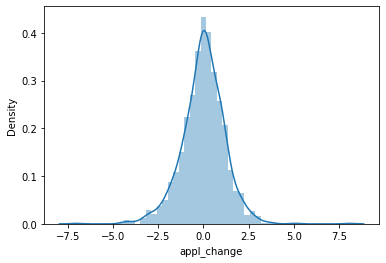

In [73]:
sns.distplot(data['appl_change'])

#We can notice is shows normal distribution

In [75]:
data['appl_change'].std()

1.1871377131421237

In [76]:
data['appl_change'].quantile(0.1)

-1.4246644227944307

1.4246644227944307 means that 90% of the times the worst daily Loss will not exceed 1.42

In [77]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
appl_change,1259.0,-0.000215,1.187138,-7.104299,-0.658021,0.042230,0.715427,8.000388
goog_change,975.0,-0.012495,1.092560,-5.952266,-0.551963,0.024951,0.672649,4.943550
amzn_change,1259.0,-0.000398,1.358679,-9.363077,-0.738341,-0.002623,0.852568,5.640265
msft_change,1259.0,0.076404,1.059260,-5.177618,-0.509241,0.061069,0.703264,4.861491
